In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train/255
x_test = x_test/255

In [4]:
model = Sequential()
model.add(SimpleRNN(128, activation='tanh', return_sequences=True))
model.add(SimpleRNN(128, activation='tanh'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8923 - loss: 0.3503
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9424 - loss: 0.1969
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9457 - loss: 0.1833


In [5]:
model = Sequential()
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(LSTM(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.8570 - loss: 0.4361
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9681 - loss: 0.1054
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9779 - loss: 0.0740


In [12]:
predicted=model.evaluate(x_test, y_test)
predicted=model.predict(x_test)
import numpy as np
np.argmax(predicted[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9758 - loss: 0.0769
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


np.int64(7)

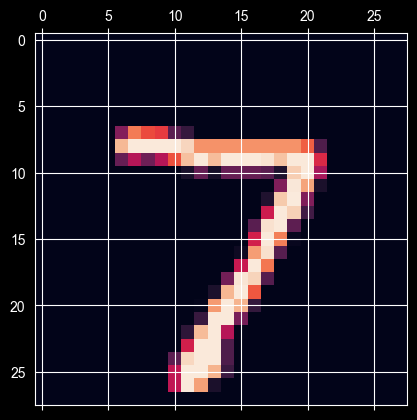

In [13]:
import matplotlib.pyplot as pt
pt.matshow(x_test[0])

In [17]:
import keras
keras.saving.save_model(model, 'model_lstm.keras')